<a href="https://colab.research.google.com/github/Es-YES-Ye/Python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신러닝

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris()
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
data =iris_data['data']
target = iris_data['target']
tnames = iris_data['target_names']
for i,y in enumerate(target):
  print(f'{i}:{tnames[y]}')

0:setosa
1:setosa
2:setosa
3:setosa
4:setosa
5:setosa
6:setosa
7:setosa
8:setosa
9:setosa
10:setosa
11:setosa
12:setosa
13:setosa
14:setosa
15:setosa
16:setosa
17:setosa
18:setosa
19:setosa
20:setosa
21:setosa
22:setosa
23:setosa
24:setosa
25:setosa
26:setosa
27:setosa
28:setosa
29:setosa
30:setosa
31:setosa
32:setosa
33:setosa
34:setosa
35:setosa
36:setosa
37:setosa
38:setosa
39:setosa
40:setosa
41:setosa
42:setosa
43:setosa
44:setosa
45:setosa
46:setosa
47:setosa
48:setosa
49:setosa
50:versicolor
51:versicolor
52:versicolor
53:versicolor
54:versicolor
55:versicolor
56:versicolor
57:versicolor
58:versicolor
59:versicolor
60:versicolor
61:versicolor
62:versicolor
63:versicolor
64:versicolor
65:versicolor
66:versicolor
67:versicolor
68:versicolor
69:versicolor
70:versicolor
71:versicolor
72:versicolor
73:versicolor
74:versicolor
75:versicolor
76:versicolor
77:versicolor
78:versicolor
79:versicolor
80:versicolor
81:versicolor
82:versicolor
83:versicolor
84:versicolor
85:versicolor
86:ver

In [ ]:
sepal_lengths=data[:50,[0]] #setosa 품종의 sepal_length만 추출(독립변수로 사용하기 위해 2차원 배열)
sepal_widths = data[:50,1] #setosa 품종의 sepal_width만 추출 (종속변수로 사용하기 위해 1차원 배열)
sepal_widths

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

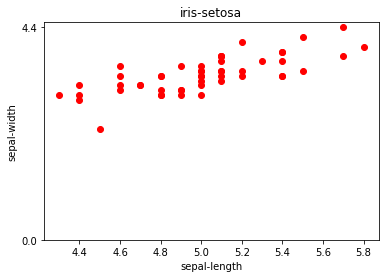

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sepal_lengths[:,0],sepal_widths, 'ro', label='setosa')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.yticks([0,max(sepal_widths)])
plt.title('iris-setosa')
plt.show()

In [ ]:
train_xs = sepal_lengths[:len(sepal_lengths)*2//3]
train_ys = sepal_widths[:len(sepal_widths)*2//3]
test_xs = sepal_lengths[:len(sepal_lengths)*2//3:]
test_ys = sepal_widths[:len(sepal_widths)*2//3:]
print(f"학습용 길이:{len(train_ys)} 테스트용 길이 : {len(test_ys)}")

학습용 길이:33 테스트용 길이 : 33


거리 계산

In [ ]:
import numpy as np

In [ ]:
def distance(x1, x2):
  if isinstance(x1, int) and isinstance(x2, int): #두 개의 값이 모두 int 형식일 때
    return np.abs(x2-x1) #차이의 절대값을 반환
  if isinstance(x1,list) and isinstance(x2,list):
    x1=np.array(x1)
    x2=np.array(x2)
  return sum((x1-x2)**2)**(1/2)

In [ ]:
na1 = np.array([1,2])
na2 = np.array([4,6])
distance(na1, na2)

5.0

k개의 가까운 이웃을 찾아라

In [ ]:
def find_k_nearest_neighbor(xs,ys,tx,k=5):
  """
   xs:독립 변수(학습 데이터)
   ys:종속 변수(학습 데이터)
   tx:독립 변수(예측에 사용할 신입)
   K:찾을 이웃 수
   반환
  """
  sarr=[]
  for i,x in enumerate(xs):
    dis = distance(x,tx)
    sarr.append((dis,i)) #계산한 거리와 인덱스를 보관

  sarr.sort(key=lambda x:x[0])#dis 순으로 정렬

  k = min(k,len(sarr)) #현재 학습 데이터 개수와 k 중에 최솟값을 k로 확정
  neighbors = [x[1] for x in sarr[:k]] #거리가 가까운 이웃 k개의 인덱스로 리스트 구성
  return sum(ys[neighbors])/k #이웃의 평균 값을 반환

In [ ]:
def find_k_nearest_neighbors(xs,ys, t_xs, k=5):
  return [find_k_nearest_neighbor(xs,ys,tx,k) for tx in t_xs]

In [ ]:
pred_val = find_k_nearest_neighbors(train_xs, train_ys, test_xs)
pred_val

[3.56,
 3.22,
 3.2399999999999998,
 3.3,
 3.38,
 3.66,
 3.3,
 3.38,
 3.2,
 3.22,
 3.66,
 3.22,
 3.22,
 3.2,
 3.9599999999999995,
 3.9599999999999995,
 3.66,
 3.56,
 3.9599999999999995,
 3.56,
 3.66,
 3.56,
 3.3,
 3.56,
 3.22,
 3.38,
 3.38,
 3.6,
 3.6,
 3.2399999999999998,
 3.22,
 3.66,
 3.6]

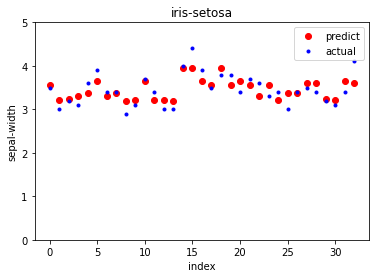

In [ ]:
plt.plot(pred_val,'ro', label='predict')
plt.plot(test_ys,'b.',label='actual')
plt.ylim(0,5)
plt.legend()
plt.xlabel("index")
plt.ylabel("sepal-width")
plt.title("iris-setosa")
plt.show()

In [ ]:
print(np.mean(np.abs(pred_val-test_ys)/test_ys))

0.05346171831414459


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knr_model = KNeighborsRegressor(n_neighbors=3) #모델 개체 생성
knr_model.fit(train_xs, train_ys) #학습하세요.
pred_val2 = knr_model.predict(test_xs) #예측하세요.

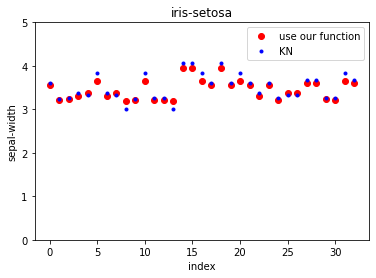

In [ ]:
plt.plot(pred_val,'ro', label='use our function')
plt.plot(pred_val2,'b.', label='KN')
plt.ylim(0,5)
plt.legend()
plt.xlabel("index")
plt.ylabel("sepal-width")
plt.title("iris-setosa")
plt.show()

In [ ]:
print(np.mean(np.abs(pred_val2-test_ys)/test_ys))

0.053037591345606316


In [ ]:
print(find_k_nearest_neighbor(train_xs, train_ys,[3,4]))
print(find_k_nearest_neighbor(train_xs, train_ys,[6]))
print(find_k_nearest_neighbor(train_xs, train_ys,[8]))
print(find_k_nearest_neighbor(train_xs, train_ys,[80]))


3.2
3.9599999999999995
3.9599999999999995
3.9599999999999995


KNN에서 독립변수에 특성이 여러 개이고 특성에 따라 크기의 차이가 상당할 때

In [52]:
train_xs2 = np.array([[180,0.84],[190,0.89],[120,0.89],[150,0.49],[160,0.58],[170,0.65]])#[키, 몸무게]
train_ys2 = np.array([32,33,24,26,30,31]) #[허리둘레]
print(find_k_nearest_neighbor(train_xs2,train_ys2,[201,1.10],k=1))
print(find_k_nearest_neighbor(train_xs2,train_ys2,[186,0.84],k=1))

33.0
33.0


In [38]:
distance([180,0.84],[186,0.84]),distance([190,0.89],[186,0.84])

(6.0, 4.000312487793923)

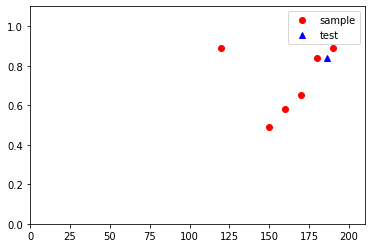

In [39]:
plt.plot(train_xs2[:,0],train_xs2[:,1],'ro', label='sample')
plt.plot([186],[0.84],'b^',label = "test")
plt.legend()
plt.xlim(0,210)
plt.ylim(0,1.10)
plt.show()

In [44]:
heights = train_xs2[:,0]
hm = heights.mean()
hs = heights.std()
heights2 = heights-hm #수평 이동
heights3 = heights2/hs #표준편차만큼 비율 조절

hm3 = heights3.mean()
hs3 = heights3.std()
hm3, hs3

(3.978299171573478e-16, 1.0)

In [45]:
weights = train_xs2[:,1]
wm = weights.mean()
ws = weights.std()

weights2 = weights-wm #수평 이동
weights3 = weights2/ws #표준편차만큼 비율 조절

wm3 = weights3.mean()
ws3 = weights3.std()
wm3, ws3

(-1.0547118733938987e-15, 1.0)

In [46]:
rescaled_train_xs = np.array([ [heights3[i], w] for i, w in enumerate(weights3) ])
rescaled_train_xs

array([[ 0.80873608,  0.73901526],
       [ 1.24986486,  1.05573609],
       [-1.83803656,  1.05573609],
       [-0.51465024, -1.47803052],
       [-0.07352146, -0.90793304],
       [ 0.36760731, -0.46452388]])

In [49]:
h = 186
w = 0.84
w3 = (w-wm)/ws
h3 = (h-hm)/hs
h3, w3

(1.0734133482569597, 0.7390152621801355)

In [54]:
print(find_k_nearest_neighbor(rescaled_train_xs, train_ys2, [h3,w3], k=1))

32.0


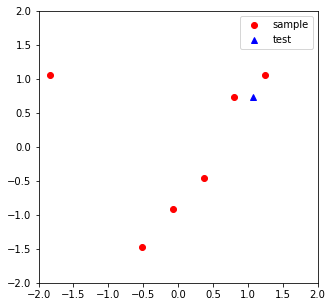

In [55]:
plt.figure(figsize=(5,5))
plt.plot(rescaled_train_xs[:,0],rescaled_train_xs[:,1],'ro',label='sample')
plt.plot([h3], [w3], 'b^', label="test")
plt.legend()
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

선형 회귀 VS KNN 회귀

회귀 모델 vs 분류모델(KNN 분류) VS 군집 모델(KMeans)

스케일 조절의 필요성

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
